In [1]:
from grafos import *

In [2]:
g=Grafo()

In [3]:
g.añadir_arista(1,2)
g.añadir_arista(1,3)
g.añadir_arista(1,4)
g.añadir_arista(2,3)
g.añadir_arista(3,4)
g.añadir_arista(3,5)
g.añadir_arista(4,5)

In [4]:
g.ponderado([[10,10], [10,20], [10,0],[30,10], [10,15], [20,20],[10,10]])

{(1, 2): [10, 10],
 (1, 3): [10, 20],
 (1, 4): [10, 0],
 (2, 3): [30, 10],
 (3, 4): [10, 15],
 (3, 5): [20, 20],
 (4, 5): [10, 10]}

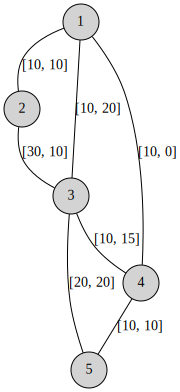

In [8]:
g.dibujar_ponderado()

In [10]:
def Ford_Fulkerson(gg, v_ini, v_fin, explicado=False):
    
    
    def cam_simples(g, v_inic, v_f):
        
        def auxiliar(v_f,c_actual,v_usados,caminos):
            v_actual = c_actual[-1]
            if v_actual == v_f:
                caminos.append(list(c_actual))
            else:
                for i in g.vecinos(v_actual):
                    #print((v_actual,i), ' = ', g.dic_pesos[(v_actual,i)][0])
                    if i not in v_usados:
                        if (v_actual,i) in g.aristas:
                            if g.dic_pesos[(v_actual,i)][0]!=0:
                                #print('OK If')
                                c_actual.append(i)
                                v_usados.append(i)
                                #print(v_f,c_actual,v_usados,caminos)
                                auxiliar(v_f,c_actual,v_usados,caminos)
                                #print('? If')
                                v_usados.remove(i)
                                c_actual.pop()
                        else:
                            if g.dic_pesos[(i, v_actual)][1]!=0:
                                #print('OK Else')
                                c_actual.append(i)
                                v_usados.append(i)
                                #print(v_f,c_actual,v_usados,caminos)
                                auxiliar(v_f,c_actual,v_usados,caminos)
                                #print('? Else')
                                v_usados.remove(i)
                                c_actual.pop()
            return caminos

        return auxiliar(v_f,[v_inic],[v_inic],[])


 # -----------------------------------------------------------------------------------    
    
    
    if explicado==True:
        
        leyenda_pesos=[]
        textos=[]
        aris_modif=[] # Aquí guardo las aristas modificadas para resaltarlas luego
        g=deepcopy(gg)
        pesos_inicial=deepcopy(g.dic_pesos)
        p=deepcopy(g.dic_pesos)
        leyenda_pesos.append(p)
        g1=deepcopy(gg)
        G=[g1]

        Ks=[]
        C1= cam_simples(g,v_ini, v_fin)

        while len(C1)>0:

            C=deepcopy(C1)
            j=0

            while len(C)>1:

                pes=[]
                CC=[]

                for i in C:
                    if (i[j],i[j+1]) in g.aristas:
                        pes.append(g.dic_pesos[(i[j],i[j+1])][0])
                    else:
                        pes.append(g.dic_pesos[(i[j+1],i[j])][1])

                maxi=max(pes)
                #flujos.append(maxi)

                for i in C:
                    if (i[j],i[j+1]) in g.aristas:
                        if g.dic_pesos[(i[j],i[j+1])][0]==maxi:
                            CC.append(i)
                    else:
                        if g.dic_pesos[(i[j+1],i[j])][1]==maxi:
                            CC.append(i)

                C=deepcopy(CC)
                j=j+1

            C=C[0] # Porque C solo tiene un elemento, para que quiero tenerlo como lista de lista
            flujos=[] # Aquí guardo los flujos salientes escogidos para luego coger su mínimo.

            for i in range(len(C)-1):
                if (C[i],C[i+1]) in g.aristas:
                    flujos.append(g.dic_pesos[(C[i],C[i+1])][0])
                else:
                    flujos.append(g.dic_pesos[(C[i+1],C[i])][1])

            k=min(flujos)
            Ks.append(k)

            # El único elemento que contiene C es el camino escogido, con lo que sumo y resto K en los flujos entrantes y salientes.
            # Es decir, actualizo los flujos de las aristas del camino escogido.
            
            aris_aux=[]
            for i in range(len(C)-1):
                
                aris_aux.append((C[i], C[i+1]))

                if (C[i], C[i+1]) in g.aristas:
                    g.dic_pesos[(C[i], C[i+1])][0] = g.dic_pesos[(C[i], C[i+1])][0]-k
                    g.dic_pesos[(C[i], C[i+1])][1] = g.dic_pesos[(C[i], C[i+1])][1]+k

                else:
                    g.dic_pesos[(C[i+1], C[i])][0] = g.dic_pesos[(C[i+1], C[i])][0]+k
                    g.dic_pesos[(C[i+1], C[i])][1] = g.dic_pesos[(C[i+1], C[i])][1]-k
            
            aris_modif.append(aris_aux)
            pp=[g.dic_pesos[i] for i in g.dic_pesos]
            mensaje='Modifico las aristas ' + str(aris_aux) + ' con peso mínimo K= ' + str(k)
            textos.append(mensaje)
            g.ponderado(pp)
            p=deepcopy(g.dic_pesos)
            leyenda_pesos.append(p)
            g1=deepcopy(g)
            G.append(g1)

            C1= cam_simples(g,v_ini, v_fin)

        F_maximo=0

        for i in Ks:
            F_maximo=F_maximo+i

        flujos_aristas={}
        for i in pesos_inicial:
            if pesos_inicial[i][0]-g.dic_pesos[i][0] >0:
                flujos_aristas[i] = pesos_inicial[i][0]-g.dic_pesos[i][0]
            else:
                flujos_aristas[i] = pesos_inicial[i][1]-g.dic_pesos[i][1]

        l=[flujos_aristas[i] for i in g.aristas]
        g.ponderado(l)
        p=deepcopy(g.dic_pesos)
        leyenda_pesos.append(p)

        L=[]
        
        L.append(G[0].dibujar_ponderado().render('0'))

        for i in range(1,len(G)):
            L.append(G[i].resaltar_arista(aris_modif[i-1], {}, 'red', '3', 'dot').render(str(i)))

        # Añadimos ya el grafo final y un mensaje con el flujo máximo

        
        L.append(g.dibujar_ponderado().render(str(len(G)+1)))
        
        textos.append('')
        textos.append('Flujo máximo = ' + str(F_maximo))
        
        g.pasoapaso(L,textos, leyenda_pesos)

    else:
        
        g=deepcopy(gg)
        pesos_inicial=deepcopy(g.dic_pesos)

        Ks=[]
        C1= cam_simples(g, v_ini, v_fin)

        while len(C1)>0:

            C=deepcopy(C1)
            j=0

            while len(C)>1:

                pes=[]
                CC=[]

                for i in C:
                    if (i[j],i[j+1]) in g.aristas:
                        pes.append(g.dic_pesos[(i[j],i[j+1])][0])
                    else:
                        pes.append(g.dic_pesos[(i[j+1],i[j])][1])

                maxi=max(pes)
                #flujos.append(maxi)

                for i in C:
                    if (i[j],i[j+1]) in g.aristas:
                        if g.dic_pesos[(i[j],i[j+1])][0]==maxi:
                            CC.append(i)
                    else:
                        if g.dic_pesos[(i[j+1],i[j])][1]==maxi:
                            CC.append(i)

                C=deepcopy(CC)
                j=j+1

            C=C[0] # Porque C solo tiene un elemento, para que quiero tenerlo como lista de lista
            flujos=[] # Aquí guardo los flujos salientes escogidos para luego coger su mínimo.

            for i in range(len(C)-1):
                if (C[i],C[i+1]) in g.aristas:
                    flujos.append(g.dic_pesos[(C[i],C[i+1])][0])
                else:
                    flujos.append(g.dic_pesos[(C[i+1],C[i])][1])

            k=min(flujos)
            Ks.append(k)

            # El único elemento que contiene C es el camino escogido, con lo que sumo y resto K en los flujos entrantes y salientes.
            # Es decir, actualizo los flujos de las aristas del camino escogido.

            for i in range(len(C)-1):

                if (C[i], C[i+1]) in g.aristas:
                    g.dic_pesos[(C[i], C[i+1])][0] = g.dic_pesos[(C[i], C[i+1])][0]-k
                    g.dic_pesos[(C[i], C[i+1])][1] = g.dic_pesos[(C[i], C[i+1])][1]+k

                else:
                    g.dic_pesos[(C[i+1], C[i])][0] = g.dic_pesos[(C[i+1], C[i])][0]+k
                    g.dic_pesos[(C[i+1], C[i])][1] = g.dic_pesos[(C[i+1], C[i])][1]-k

            C1= cam_simples(g,v_ini,v_fin)

        F_maximo=0

        for i in Ks:
            F_maximo=F_maximo+i

        flujos_aristas={}
        for i in pesos_inicial:
            if pesos_inicial[i][0]-g.dic_pesos[i][0] >0:
                flujos_aristas[i] = pesos_inicial[i][0]-g.dic_pesos[i][0]
            else:
                flujos_aristas[i] = pesos_inicial[i][1]-g.dic_pesos[i][1]

        l=[flujos_aristas[i] for i in g.aristas]
        g.ponderado(l)
        
        print('Flujo máximo = ', F_maximo)
        return g

In [11]:
H=Ford_Fulkerson(g, 1, 5, True)

A Jupyter Widget